## COMPUTER VISION MODEL TRAINING

### 0. Setup Paths

In [1]:
import os

In [2]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8' #choosen from TFOD Model zoo
#The following is the link by right-clik on the model in the TFOD Model Zoo page
PRETRAINED_MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'
TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'
#wd="" #working directory

In [3]:
#this dictionary creates the paths that are needed
paths = {
    'WORKSPACE_PATH': os.path.join(wd,'Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join(wd,'Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join(wd,'Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join(wd,'Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join(wd,'Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join(wd,'Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join(wd,'Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join(wd,'Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join(wd,'Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join(wd,'Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join(wd,'Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join(wd,'Tensorflow','protoc')
 }

In [4]:
files = {
    'PIPELINE_CONFIG':os.path.join(wd,'Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME), 
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [5]:
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

# 1. Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

**Models available**:  https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md  

In this page:
* Speed millisecond for frame
* COCO mAP (Coco metrics are based on a popoluar object detection
* dataset called COCO, mAP mean avarange precision) Coco in a standard dataset.

If for example I want to use a model on a raspberry PI, which is devoid of any acceleration,
I absolutely have to use a fast model

For example, the difference between SSD MobileNet V2 FPNLite 320x320 and SSD MobileNet V2 FPNLite 640x640, are that the first model is going to compress the images from 640 by 480 which we had from the webcam to 320x320 (pre-processing --> techinique to compress that down to 320x320) and then in post-processing it is going to take the dections that it found and convert it back to the original resolution. (advantages of the TFOD model --> you don't have to do the painfull **pre/post processing**).

Another thing is that TFOD models do **image augumentation**, without do anything.

The slowest is Mask R-CNN Inception ResNet V2 1024x1024 : it uses another technique called **Mask model** that does image segmentation (not only the boxes but deteced the specific shape, not just the box).

https://www.tensorflow.org/install/source_windows

In [13]:
if os.name=='nt':
    !pip install wget
    import wget

In [9]:
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}

## TENSORFLOW OBJECT DETECTION API AND PROTOBUF INSTALLATION

Install protoc, set it up and install TFOD API.
Protocol Buffers (Protobuf) is a method of serializing structured data.
It is useful in developing programs to communicate with each other over a network or for storing data
see this official tutorial to install them: https://tensorflow-object-detection-api-tutorial.readthedocs.io/en/latest/install.html#set-env
After extracting the zip in a path you need to copy put protoc.exe in C: \ Users \ Chiara \ AppData \ Local \ Programs \ Python \ Python38 \
and put the protobuf path in the system variables
SE DA PROBLEMI (NON ESISTE IL MODULO GOOGLE.PROTOBUF ANDARE IN C:\Users\Chiara\AppData\Local\Programs\Python\Python38\Lib\site-packages\protobuf-3.15.8.dist-info, ELIMINARE QUESTA CARTELLA E FARE PIP INSTALL PROTOBUF)


In [6]:
#do this verification step to check if everything is installed correctly
#probably some module will be missing  so you need to install it "manually"

VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
#if everything is working the final output will be "OK (skipped=1)"
!python {VERIFICATION_SCRIPT}

2021-04-25 11:38:48.733367: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-04-25 11:38:48.734482: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.8.1: C:\Users\Chiara\AppData\Local\Programs\Python\Python38\python.exe
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model
C:\Users\Chiara\AppData\Local\Programs\Python\Python38\lib\site-packages\tensorflow\python\training\tracking\data_structures.py:718: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  if not isinstance(wrapped_dict, collections.Mapping):
[       OK ] ModelBuilderTF2Test.test_create_center_net_model
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model_from_keypoints
[       

In [7]:
#!pip install tensorflow --upgrade 

In [17]:
#!pip uninstall protobuf matplotlib -y
#!pip install protobuf matplotlib==3.2

In [11]:
import object_detection

In [1]:
#!pip list
#we have tensorflow 2.4.1, if we want to use accelerators (CUDA,cuDNN)
#we have to search online for the version compatible with this version of tensorflow
#remember to then add the path to the system variables

In [14]:
#download the model we have chosen in the path we have specified at the beginning of the notebook
if os.name =='posix':
    !wget {PRETRAINED_MODEL_URL}
    !mv {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}
if os.name == 'nt':
    wget.download(PRETRAINED_MODEL_URL)
    !move {PRETRAINED_MODEL_NAME+'.tar.gz'} {paths['PRETRAINED_MODEL_PATH']}
    !cd {paths['PRETRAINED_MODEL_PATH']} && tar -zxvf {PRETRAINED_MODEL_NAME+'.tar.gz'}

100% [........................................................................] 20515344 / 20515344        1 file spostato/i.


x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
x ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


## 2. CREATION OF THE LABEL MAP

In [15]:
#Creates an label_map.pbtxt file in the annotations folder
#Pay Attention that the label here is correct with the correct case !
labels = [{'name':'ThumbUp', 'id':1}, {'name':'ThumbDown', 'id':2}, {'name':'Open', 'id':3}, {'name':'Rock', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

## 3. CREATE TFRecords
TFTecords is binary file format for storing data.  
Using them help speed up training for your custom object detection model.

In [16]:
# OPTIONAL IF RUNNING ON COLAB
ARCHIVE_FILES = os.path.join(paths['IMAGE_PATH'], 'archive.tar.gz')
if os.path.exists(ARCHIVE_FILES):
  !tar -zxvf {ARCHIVE_FILES}

In [17]:
#creates generate_tfrecord.py in scripts folder
if not os.path.exists(files['TF_RECORD_SCRIPT']):
    !git clone https://github.com/nicknochnack/GenerateTFRecord {paths['SCRIPTS_PATH']}

In [18]:
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'train')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'train.record')} 
!python {files['TF_RECORD_SCRIPT']} -x {os.path.join(paths['IMAGE_PATH'], 'test')} -l {files['LABELMAP']} -o {os.path.join(paths['ANNOTATION_PATH'], 'test.record')} 

Successfully created the TFRecord file: C:\Users\Chiara\TFODCourse\Tensorflow\workspace\annotations\train.record
Successfully created the TFRecord file: C:\Users\Chiara\TFODCourse\Tensorflow\workspace\annotations\test.record


# 4. Copy Model Config to Training Folder

In [19]:
#copy the "pipeline" file created in the cell before in the models / my_sdd_mobnet folder
if os.name =='posix':
    !cp {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}
if os.name == 'nt':
    !copy {os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'pipeline.config')} {os.path.join(paths['CHECKPOINT_PATH'])}

        1 file copiati.


# 5. Update Config For Transfer Learning

In [20]:
import tensorflow as tf
from keras import utils
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [21]:
config = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])

In [22]:
config

{'model': ssd {
   num_classes: 90
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 4e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.01
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.997
         scale: true
         epsilon: 0.001
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   matcher {
     argmax_matcher {
       matched_threshold: 0.5
   

In [23]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [24]:
pipeline_config.model.ssd.num_classes = len(labels)
pipeline_config.train_config.batch_size = 4
pipeline_config.train_config.fine_tune_checkpoint = os.path.join(paths['PRETRAINED_MODEL_PATH'], PRETRAINED_MODEL_NAME, 'checkpoint', 'ckpt-0')
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= files['LABELMAP']
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'train.record')]
pipeline_config.eval_input_reader[0].label_map_path = files['LABELMAP']
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.join(paths['ANNOTATION_PATH'], 'test.record')]

In [25]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['PIPELINE_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)   

# 6. Train the model

In [26]:
TRAINING_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'model_main_tf2.py')

In [27]:
command = "python {} --model_dir={} --pipeline_config_path={} --num_train_steps=2000".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'])

In [28]:
#We need to take the result of this print and put it in the cmd to see the trining. Every 100 step will print INFO: tensorflow: Step 300 per-step time ??? s loss = ???
#I0419 20: 51: 02.754394 17556 model_lib_v2.py
#The various checkpoints will be saved here: \ Tensorflow \ workspace \ models \ my_ssd_mobnet
print(command)

python C:\Users\Chiara\TFODCourse\Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=C:\Users\Chiara\TFODCourse\Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=C:\Users\Chiara\TFODCourse\Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --num_train_steps=2000


In [2]:
#Or you can run it directly from here, however it will show the result only when finished and not the various steps 
#it is processing
#!{command}

# 7. Evaluate the Model

In [118]:
#'if error : numpy.float64' object cannot be interpreted as an integer
print(tf.__version__) #2.2.0
print(np.__version__) #1.19.5
!pip install numpy==1.17.4 --user

2.2.0
1.19.5
  Using cached numpy-1.17.4-cp38-cp38-win_amd64.whl (12.7 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
object-detection 0.1 requires apache-beam, which is not installed.
object-detection 0.1 requires avro-python3, which is not installed.
object-detection 0.1 requires contextlib2, which is not installed.
tf-models-official 2.4.0 requires dataclasses, which is not installed.
tf-models-official 2.4.0 requires google-api-python-client>=1.6.7, which is not installed.
tf-models-official 2.4.0 requires google-cloud-bigquery>=0.31.0, which is not installed.
tf-models-official 2.4.0 requires kaggle>=1.3.9, which is not installed.
tf-models-official 2.4.0 requires oauth2client, which is not installed.
tf-models-official 2.4.0 requires opencv-python-headless, which is not installed.
tf-models-official 2.4.0 requires psutil>=5.4.3, which is not installed.
tf-models-official 2.4.0 requires py-cpuinfo>=3.3.0, which is not instal

In [29]:
command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [30]:
print(command)

python C:\Users\Chiara\TFODCourse\Tensorflow\models\research\object_detection\model_main_tf2.py --model_dir=C:\Users\Chiara\TFODCourse\Tensorflow\workspace\models\my_ssd_mobnet --pipeline_config_path=C:\Users\Chiara\TFODCourse\Tensorflow\workspace\models\my_ssd_mobnet\pipeline.config --checkpoint_dir=C:\Users\Chiara\TFODCourse\Tensorflow\workspace\models\my_ssd_mobnet


In [3]:
#!{command}

# 8. Load Train Model From Checkpoint

In [31]:
import os
import tensorflow as tf
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [32]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-3')).expect_partial() #in case of error put here the correct name of the checkpoint

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

# 9. Detect from an Image

In [33]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
category_index = object_detection.utils.label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [35]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

In [36]:
#change the name of the image you want to test
IMAGE_PATH = os.path.join(paths['IMAGE_PATH'], 'test', 'thumbsup.f0202e84-a34b-11eb-99c7-dc8b28585c09.jpg') 

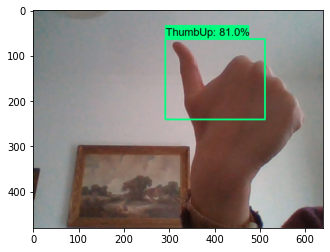

In [37]:
img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.8,
            agnostic_mode=False)

plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()
#plt.savefig(r"C:\Users\Chiara\TFODCourse\prova.png")

# 10. Real Time Detections from your Webcam

In [4]:
#!pip uninstall opencv-python-headless -y

In [44]:
cap = cv2.VideoCapture(0)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

while cap.isOpened(): 
    ret, frame = cap.read()
    image_np = np.array(frame)
    
    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                  for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    label_id_offset = 1
    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
                image_np_with_detections,
                detections['detection_boxes'],
                detections['detection_classes']+label_id_offset,
                detections['detection_scores'],
                category_index,
                use_normalized_coordinates=True,
                max_boxes_to_draw=5,
                min_score_thresh=.8,
                agnostic_mode=False)

    cv2.imshow('object detection',  cv2.resize(image_np_with_detections, (800, 600)))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        cap.release()
        cv2.destroyAllWindows()
        break

KeyboardInterrupt: 

# 13. Zip and Export Models 

In [ ]:
!tar -czf models.tar.gz {paths['CHECKPOINT_PATH']}

In [ ]:
#if you needed on google colab:
from google.colab import drive
drive.mount('/content/drive')